In [1]:
import pandas as pd

In [2]:
region1 = pd.read_csv("region1.csv")
region2 = pd.read_csv("region2.csv")

In [3]:
title1 = pd.DataFrame(region1)
title2 = pd.DataFrame(region2)
titles = [title1, title2]
titles_all = pd.concat(titles)

In [4]:
title_basics = pd.read_csv('raw_basic1.csv')
title_basics.head()

,titleType,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,short,tt0000001,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,short,tt0000002,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,short,tt0000003,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,short,tt0000004,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [5]:
merge_df1 = pd.merge(titles_all, title_basics, how = "left", left_on="titleId", right_on="tconst")
merge_df1.head()

,ordering,titleId,title,region,language,types,attributes,isOriginalTitle,titleType,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,short,tt0000001,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,short,tt0000002,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
3,5,tt0000005,Blacksmith Scene #1,US,\N,alternative,\N,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
4,7,tt0000005,Blacksmithing,US,\N,\N,informal alternative title,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [6]:
title_ratings = pd.read_csv('ratings.csv')
title_ratings.head()

,Unnamed: 0,ordering,titleId,title,region,language,types,attributes,isOriginalTitle,tconst,averageRating,numVotes
0,0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,tt0000001,5.7,2053.0
1,1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,tt0000002,5.7,275.0
2,2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,tt0000005,6.2,2775.0
3,3,5,tt0000005,Blacksmith Scene #1,US,\N,alternative,\N,0,tt0000005,6.2,2775.0
4,4,7,tt0000005,Blacksmithing,US,\N,\N,informal alternative title,0,tt0000005,6.2,2775.0


In [7]:
merge_df2 = pd.merge(merge_df1, title_ratings, how = "left", left_on="titleId", right_on="titleId")
merge_df2.head()

,ordering_x,titleId,title_x,region_x,language_x,types_x,attributes_x,isOriginalTitle_x,titleType,tconst_x,...,ordering_y,title_y,region_y,language_y,types_y,attributes_y,isOriginalTitle_y,tconst_y,averageRating,numVotes
0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,short,tt0000001,...,3,Carmencita,US,\N,imdbDisplay,\N,0,tt0000001,5.7,2053.0
1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,short,tt0000002,...,6,The Clown and His Dogs,US,\N,\N,literal English title,0,tt0000002,5.7,275.0
2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,3,Blacksmith Scene,US,\N,imdbDisplay,\N,0,tt0000005,6.2,2775.0
3,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,5,Blacksmith Scene #1,US,\N,alternative,\N,0,tt0000005,6.2,2775.0
4,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,7,Blacksmithing,US,\N,\N,informal alternative title,0,tt0000005,6.2,2775.0


In [8]:
#Use Jim's code to narrow down genre categories
merge_df2.loc[merge_df2['genres'].str.startswith('Comedy',na=False),'genres'] = 'Comedy'
merge_df2.loc[merge_df2['genres'].str.startswith('Documentary',na=False),'genres'] = 'Documentary'
merge_df2.loc[merge_df2['genres'].str.startswith('Animation',na=False),'genres'] = 'Animation'
merge_df2.loc[merge_df2['genres'].str.startswith('Short',na=False),'genres'] = 'Short'
merge_df2.loc[merge_df2['genres'].str.startswith('Romance',na=False),'genres'] = 'Romance'
merge_df2.loc[merge_df2['genres'].str.startswith('News',na=False),'genres'] = 'News'
merge_df2.loc[merge_df2['genres'].str.startswith('Drama',na=False),'genres'] = 'Drama'
merge_df2.loc[merge_df2['genres'].str.startswith('Fantasy',na=False),'genres'] = 'Fantasy'
merge_df2.loc[merge_df2['genres'].str.startswith('Horror',na=False),'genres'] = 'Horror'
merge_df2.loc[merge_df2['genres'].str.startswith('Biography',na=False),'genres'] = 'Biography'
merge_df2.loc[merge_df2['genres'].str.startswith('Music',na=False),'genres'] = 'Music'
merge_df2.loc[merge_df2['genres'].str.startswith('Crime',na=False),'genres'] = 'Crime'
merge_df2.loc[merge_df2['genres'].str.startswith('Family',na=False),'genres'] = 'Family'
merge_df2.loc[merge_df2['genres'].str.startswith('Adventure',na=False),'genres'] = 'Adventure'
merge_df2.loc[merge_df2['genres'].str.startswith('Action',na=False),'genres'] = 'Action'
merge_df2.loc[merge_df2['genres'].str.startswith('History',na=False),'genres'] = 'History'
merge_df2.loc[merge_df2['genres'].str.startswith('Mystery',na=False),'genres'] = 'Mystery'
merge_df2.loc[merge_df2['genres'].str.startswith('Musical',na=False),'genres'] = 'Musical'
merge_df2.loc[merge_df2['genres'].str.startswith('War',na=False),'genres'] = 'War'
merge_df2.loc[merge_df2['genres'].str.startswith('Sci-Fi',na=False),'genres'] = 'Sci-Fi'
merge_df2.loc[merge_df2['genres'].str.startswith('Western',na=False),'genres'] = 'Western'
merge_df2.loc[merge_df2['genres'].str.startswith('Thriller',na=False),'genres'] = 'Thriller'
merge_df2.loc[merge_df2['genres'].str.startswith('Sport',na=False),'genres'] = 'Sport'
merge_df2.loc[merge_df2['genres'].str.startswith('Film-Noir',na=False),'genres'] = 'Film-Noir'
merge_df2.loc[merge_df2['genres'].str.startswith('Talk-Show',na=False),'genres'] = 'Talk-Show'
merge_df2.loc[merge_df2['genres'].str.startswith('Game-Show',na=False),'genres'] = 'Game-Show'
merge_df2.loc[merge_df2['genres'].str.startswith('Adult',na=False),'genres'] = 'Adult'
merge_df2.loc[merge_df2['genres'].str.startswith('Reality-TV',na=False),'genres'] = 'Reality-TV'

In [9]:
merge_df2['genres'].value_counts()

genres
Comedy         95699
Drama          77506
Action         46173
Adult          39404
Documentary    31560
Adventure      22666
Crime          19906
Animation      19531
Horror         13629
Short          12494
\N             11710
Western         7236
Biography       6488
Music           6211
Family          3813
Fantasy         2272
Sport           2027
Thriller        1896
News            1741
Mystery         1666
Reality-TV      1500
Romance         1301
Sci-Fi          1087
Game-Show        932
Talk-Show        792
History          470
War              253
Film-Noir        166
Name: count, dtype: int64

In [10]:
#Bin genres
merge_df2['genres'] = merge_df2['genres'].str.split('|')
exploded_genres = merge_df2.explode('genres')


In [11]:
#Print bins
genre_counts = exploded_genres['genres'].value_counts()
print(genre_counts)

genres
Comedy         95699
Drama          77506
Action         46173
Adult          39404
Documentary    31560
Adventure      22666
Crime          19906
Animation      19531
Horror         13629
Short          12494
\N             11710
Western         7236
Biography       6488
Music           6211
Family          3813
Fantasy         2272
Sport           2027
Thriller        1896
News            1741
Mystery         1666
Reality-TV      1500
Romance         1301
Sci-Fi          1087
Game-Show        932
Talk-Show        792
History          470
War              253
Film-Noir        166
Name: count, dtype: int64


In [12]:
genre_avg_rating = exploded_genres.groupby('genres')['averageRating'].mean()
print(genre_avg_rating)

genres
Action         6.197088
Adult          5.980352
Adventure      6.482503
Animation      6.437401
Biography      6.796002
Comedy         6.090482
Crime          6.283851
Documentary    6.686672
Drama          6.259206
Family         6.888271
Fantasy        5.635018
Film-Noir      6.557831
Game-Show      6.118995
History        6.625722
Horror         4.936948
Music          6.851318
Mystery        6.000721
News           5.456462
Reality-TV     6.342418
Romance        5.918954
Sci-Fi         5.099690
Short          6.256313
Sport          6.291491
Talk-Show      6.098498
Thriller       5.201178
War            6.073953
Western        6.208217
\N             6.392512
Name: averageRating, dtype: float64


In [16]:
genre_avg_rating.sort_values(ascending=False)

genres
Family         6.888271
Music          6.851318
Biography      6.796002
Documentary    6.686672
History        6.625722
Film-Noir      6.557831
Adventure      6.482503
Animation      6.437401
\N             6.392512
Reality-TV     6.342418
Sport          6.291491
Crime          6.283851
Drama          6.259206
Short          6.256313
Western        6.208217
Action         6.197088
Game-Show      6.118995
Talk-Show      6.098498
Comedy         6.090482
War            6.073953
Mystery        6.000721
Adult          5.980352
Romance        5.918954
Fantasy        5.635018
News           5.456462
Thriller       5.201178
Sci-Fi         5.099690
Horror         4.936948
Name: averageRating, dtype: float64

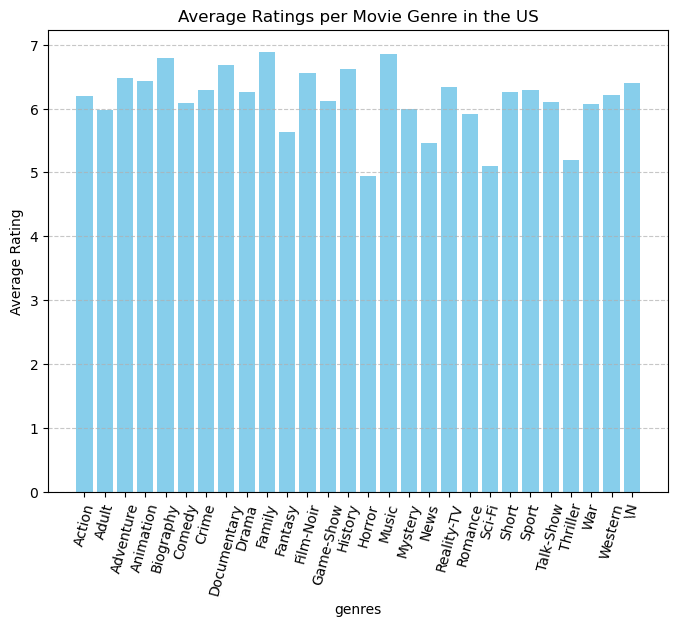

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
plt.bar(genre_avg_rating.index, genre_avg_rating.values, color='skyblue')
plt.xlabel('Genres')  # Customize the x-axis label
plt.ylabel('Average Rating')  # Customize the y-axis label
plt.title('Average Ratings per Movie Genre in the US')  # Customize the plot title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines
plt.xticks(rotation=75)  # Adjust the rotation angle as needed

plt.show()

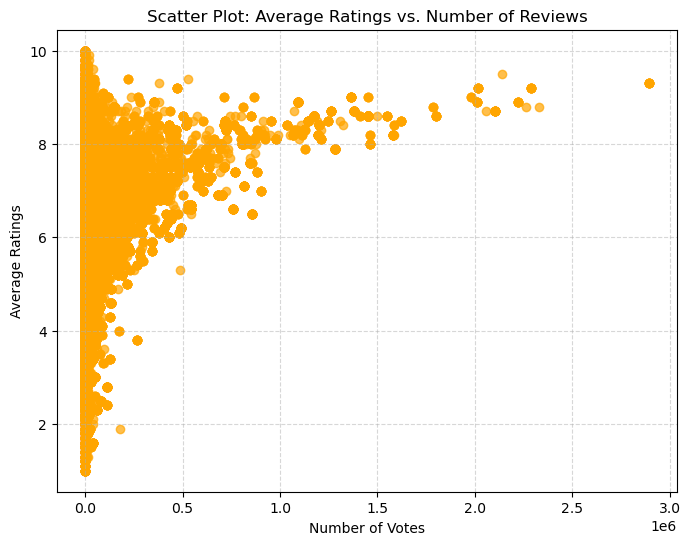

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(['numVotes'], merge_df2['averageRating'], color='orange', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Average Ratings')
plt.title('Scatter Plot: Average Ratings vs. Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [35]:
top_10_movies = merge_df2.head(10)  # Select the first 10 rows
print(top_10_movies[['title_y', 'numVotes']])

                                       title_y   numVotes
166183                The Shawshank Redemption  2892792.0
166182                The Shawshank Redemption  2892792.0
166184  Rita Hayworth and Shawshank Redemption  2892792.0
166185                The Shawshank Redemption  2892792.0
166186                The Shawshank Redemption  2892792.0
166187  Rita Hayworth and Shawshank Redemption  2892792.0
166188                The Shawshank Redemption  2892792.0
166180                The Shawshank Redemption  2892792.0
166181  Rita Hayworth and Shawshank Redemption  2892792.0
193208                              Fight Club  2327608.0
